<a href="https://colab.research.google.com/github/ZiadMAlsawy/ML_Project/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modules Import & Intiation**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tabulate


from sklearn.model_selection import train_test_split
from imblearn.under_sampling import ClusterCentroids , TomekLinks , NearMiss

from sklearn.metrics import accuracy_score , confusion_matrix , precision_score , recall_score , f1_score , classification_report , auc , roc_curve , ConfusionMatrixDisplay ,  roc_auc_score
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.preprocessing import LabelEncoder , RobustScaler

from imblearn.over_sampling import SMOTE

plt.style.use("fivethirtyeight")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **OSEMN Framework will Help us deal with our task**
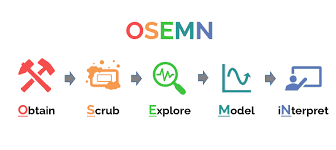

## **Obtain the Data Set**

In [3]:
creditCard = pd.read_csv('/content/drive/MyDrive/CSAI 253 Data Sets/creditcard.csv')

In [4]:
creditCard.shape

(284807, 31)

In [5]:
creditCard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
creditCard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
creditCard.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
creditCard.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
276563,167171.0,-3.193150,-0.979313,-1.601320,-0.105095,1.059260,-0.627088,1.148784,0.601946,-1.243505,...,0.170878,0.129616,-0.112727,0.299368,1.569543,0.655494,-0.007739,-0.791615,174.66,0
106325,69921.0,1.162978,-1.097519,0.905584,-0.651494,-1.455128,0.051269,-1.066579,0.002200,-0.322047,...,-0.136549,-0.086390,-0.143488,-0.381944,0.064101,1.151312,-0.017963,0.041565,125.90,0
174017,121732.0,-8.939459,-6.507176,-4.560826,2.050799,3.538983,-4.441867,-0.324519,0.434651,0.167450,...,-1.240735,2.502909,5.376536,0.200479,0.548298,0.802812,2.344007,-1.414600,0.00,0
136038,81517.0,-0.434612,-0.061949,1.631615,-1.712048,-0.182618,-0.653508,0.261913,-0.360573,-0.978270,...,-0.325441,-0.328342,-0.102667,-0.082673,-0.635581,0.765705,-0.189649,-0.082219,24.71,0
186652,127197.0,2.010301,0.107981,-1.607927,0.335601,0.423892,-0.571856,0.076810,-0.079027,0.210028,...,-0.294381,-0.770142,0.355119,0.612177,-0.324828,0.148000,-0.062696,-0.039193,1.98,0
213052,139093.0,-1.332196,0.074593,-0.366492,-0.656596,1.195849,-1.543880,1.121064,-0.560684,0.315307,...,-0.266258,0.080884,0.648807,-0.069475,0.078737,-0.131489,-0.046746,0.086123,0.00,0
9324,13505.0,-0.564638,1.150080,2.896179,2.356205,-0.459844,0.127907,-0.004725,0.116646,0.874582,...,-0.117955,-0.049341,-0.071119,0.628490,-0.258519,-0.156376,-0.070453,0.071564,0.00,0
18787,29764.0,-1.391668,-0.498857,2.403327,-1.937609,0.152528,-0.582191,0.764496,-0.570707,2.084935,...,-0.206954,0.210099,-0.185028,-0.138485,0.610203,-0.805501,-0.404044,-0.407058,59.90,0
261196,159910.0,1.661736,-1.735684,-2.830847,-1.252095,1.621862,3.480320,-0.559568,0.710076,-0.600615,...,-0.488557,-1.481432,0.208615,0.684106,-0.435048,0.351364,-0.083413,-0.020407,261.62,0
84953,60535.0,-0.303259,0.299558,0.973741,0.112371,0.148631,0.475788,0.932237,-0.030774,-0.730290,...,-0.077828,-0.117805,0.235178,-0.198839,-1.678306,2.629885,-0.284823,-0.063377,98.99,0


## **Scrubbing the Data Set from**


1.   Missing Records
2.   Duplicates
3. Outliers



**Missing Values Handler**

In [9]:
creditCard.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


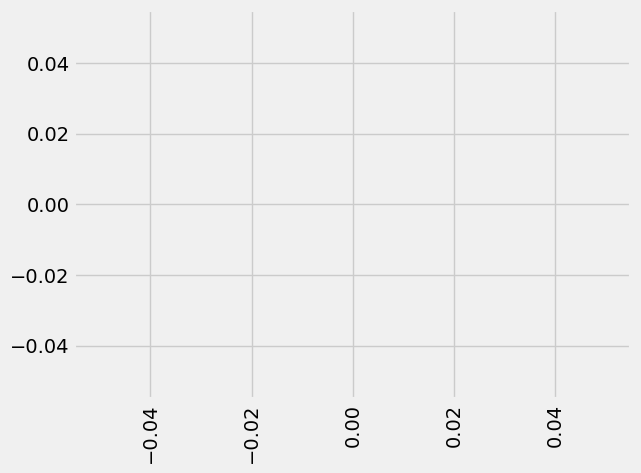

In [10]:
missing = creditCard.isnull().sum()
missing = missing[missing > 0]/creditCard.shape[0]
plt.bar(missing.index, missing.values)
plt.xticks(rotation = 90)
plt.show()
# We can conclude now that there is not any missing values in any column

**Duplicate Records Handler**

In [11]:
print(f"{creditCard.duplicated().sum() / creditCard.shape[0] * 100 :.2f}  % of the data is duplicated The Decision will be Drop out those duplicated records")
creditCard.drop_duplicates(inplace=True)

0.38  % of the data is duplicated The Decision will be Drop out those duplicated records


In [12]:
creditCard[creditCard.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


**Splitting Out the Data into Categorical Features and Numerical Features**

In [13]:
NumericalFeatures = creditCard.select_dtypes(include=['int64', 'float64'])
CategoricalFeatures = creditCard.select_dtypes(include=['object'])

**Outliers Handler**

**Summarize All Data Set Features using Box Plot**

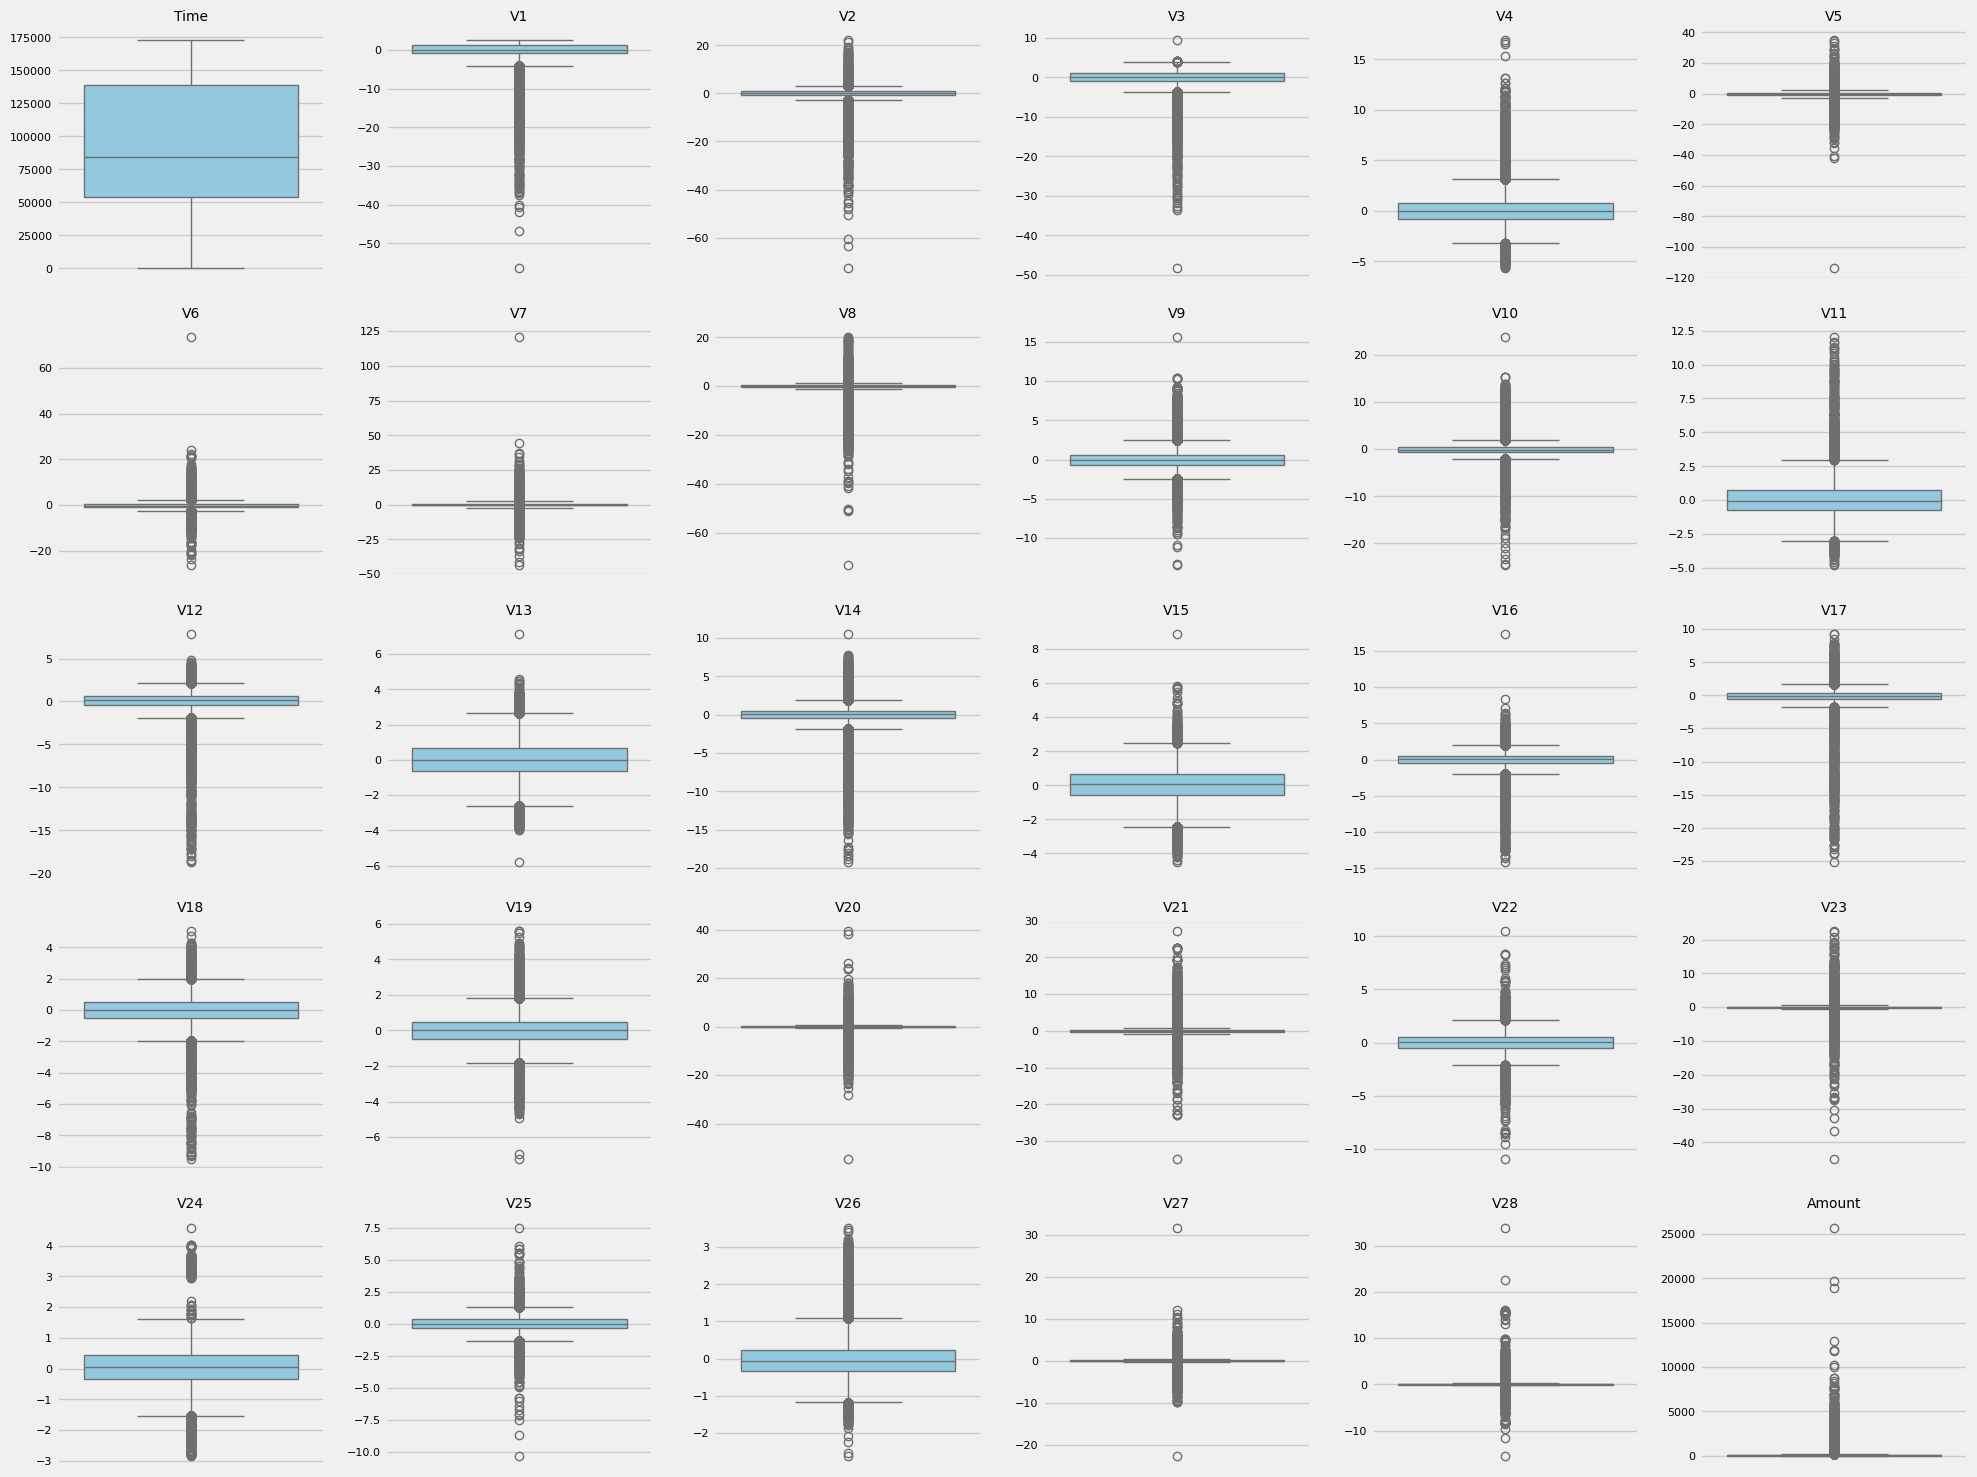

In [14]:
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(20, 15))
axes = axes.flatten()

for i, column in enumerate(creditCard.columns[:30]):
    sns.boxplot(data=creditCard, y=column, ax=axes[i], color='skyblue')
    axes[i].set_title(column, fontsize=10)
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='y', labelsize=8)

for j in range(len(creditCard.columns[:31]), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [15]:
Outliers_Frequency = {}
for i in creditCard.columns:
  Outliers_Frequency[i] = creditCard[creditCard[i] > (creditCard[i].mean() + 3 * creditCard[i].std())].shape[0]

columnsWithOutliers_Descendingely = list(Outliers_Frequency.keys())
columnsWithOutliers_Descendingely.sort(reverse=True, key=lambda x: Outliers_Frequency[x])

for i in columnsWithOutliers_Descendingely:
  print(f"{i} : {Outliers_Frequency[i]}")


Amount : 4063
V6 : 4031
V20 : 3072
V4 : 2860
V10 : 2783
V21 : 2446
V19 : 2229
V17 : 2073
V9 : 1976
V23 : 1901
V27 : 1806
V7 : 1453
V2 : 1445
V5 : 1389
V28 : 1026
V26 : 992
V8 : 978
V13 : 780
V25 : 759
V14 : 747
V11 : 565
V18 : 563
Class : 473
V22 : 337
V16 : 316
V15 : 203
V12 : 177
V24 : 125
V3 : 1
Time : 0
V1 : 0


In [16]:
scaler = RobustScaler()

NumericalFeatures_scaled = scaler.fit_transform(NumericalFeatures)

NumericalFeatures_scaled = pd.DataFrame(NumericalFeatures_scaled, columns=NumericalFeatures.columns)

creditCard[NumericalFeatures.columns] = NumericalFeatures_scaled

**Categorical Features Encoding**

In [17]:
label_encoder = LabelEncoder()

for column in CategoricalFeatures.columns:
    creditCard[column] = label_encoder.fit_transform(creditCard[column])

In [18]:
CategoricalFeatures

""
0
1
2
3
4
...
284802
284803
284804
284805


## **Exploring the Data Set Using Visualization Modules**

**Showing out the Frequency of the Features inside the data set**

In [19]:
# fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(20, 15))
# axes = axes.flatten()

# for i, column in enumerate(creditCard.columns[:30]):
#     sns.countplot(data=creditCard, x=column, ax=axes[i], color='skyblue')
#     axes[i].set_title(column, fontsize=10)
#     axes[i].set_ylabel('')

#     for p in axes[i].patches:
#         axes[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
#                         ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
#                         textcoords='offset points')
#         axes[i].tick_params(axis='y', labelsize=8)

# for j in range(len(creditCard.columns[:31]), len(axes)):
#     axes[j].axis('off')

# plt.tight_layout()
# plt.show()

**Showing up the Distribution of all the Features in the data set**

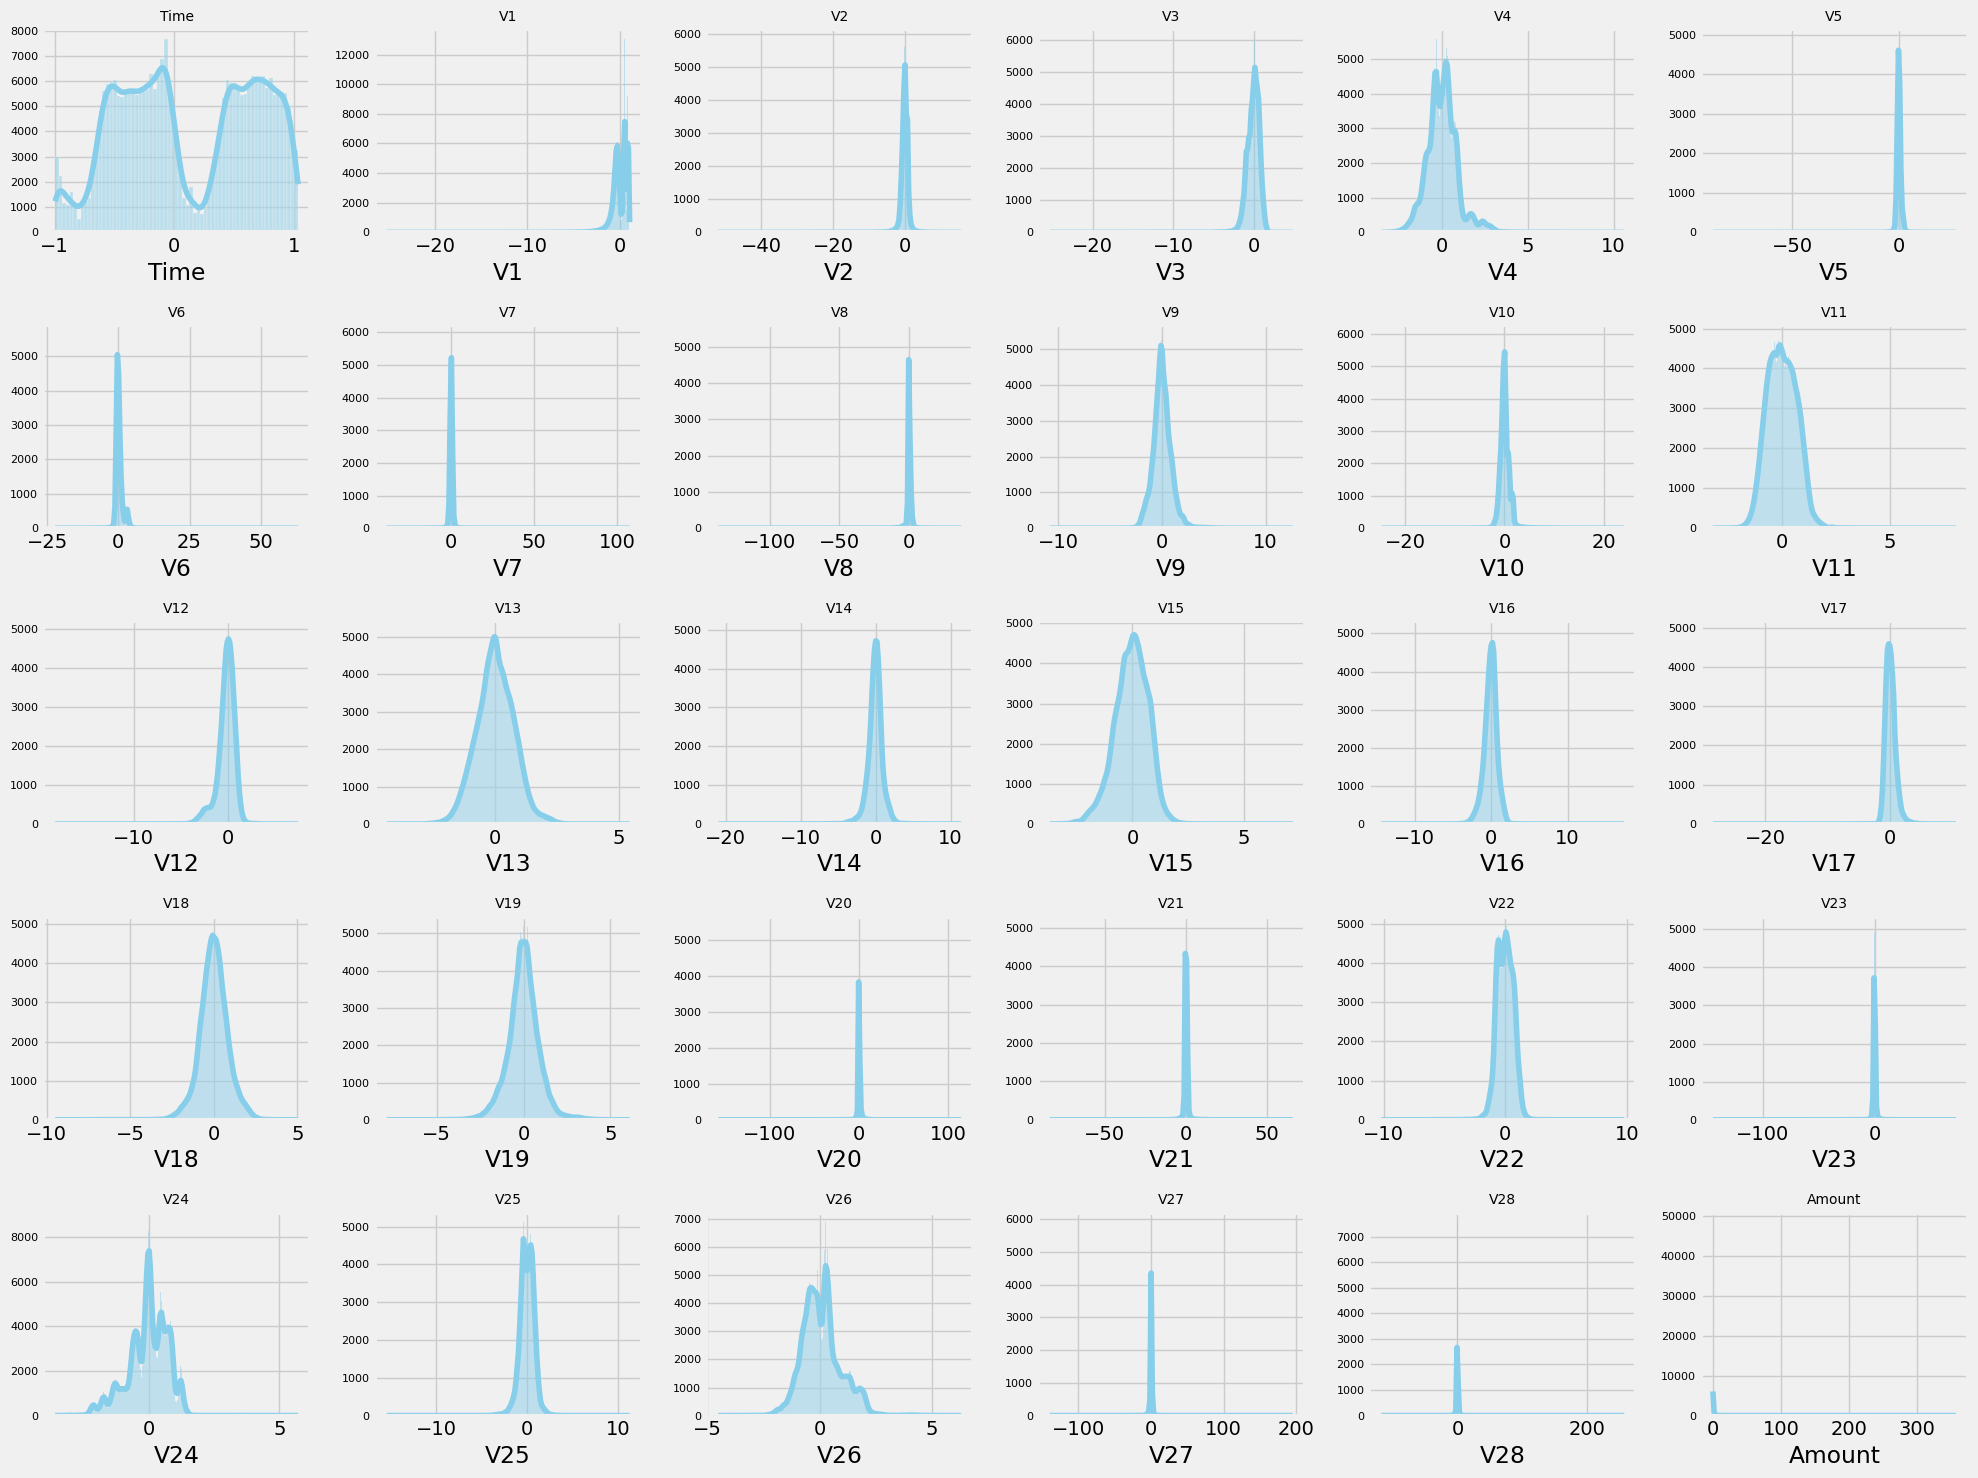

In [20]:
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(20, 15))
axes = axes.flatten()

for i, column in enumerate(creditCard.columns[:30]):
    sns.histplot(data=creditCard, x=column, ax=axes[i], kde=True, color='skyblue')  # Use histplot with kde
    axes[i].set_title(column, fontsize=10)
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='y', labelsize=8)

for j in range(len(creditCard.columns[:31]), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

**Correlation Matrix for all the Features**

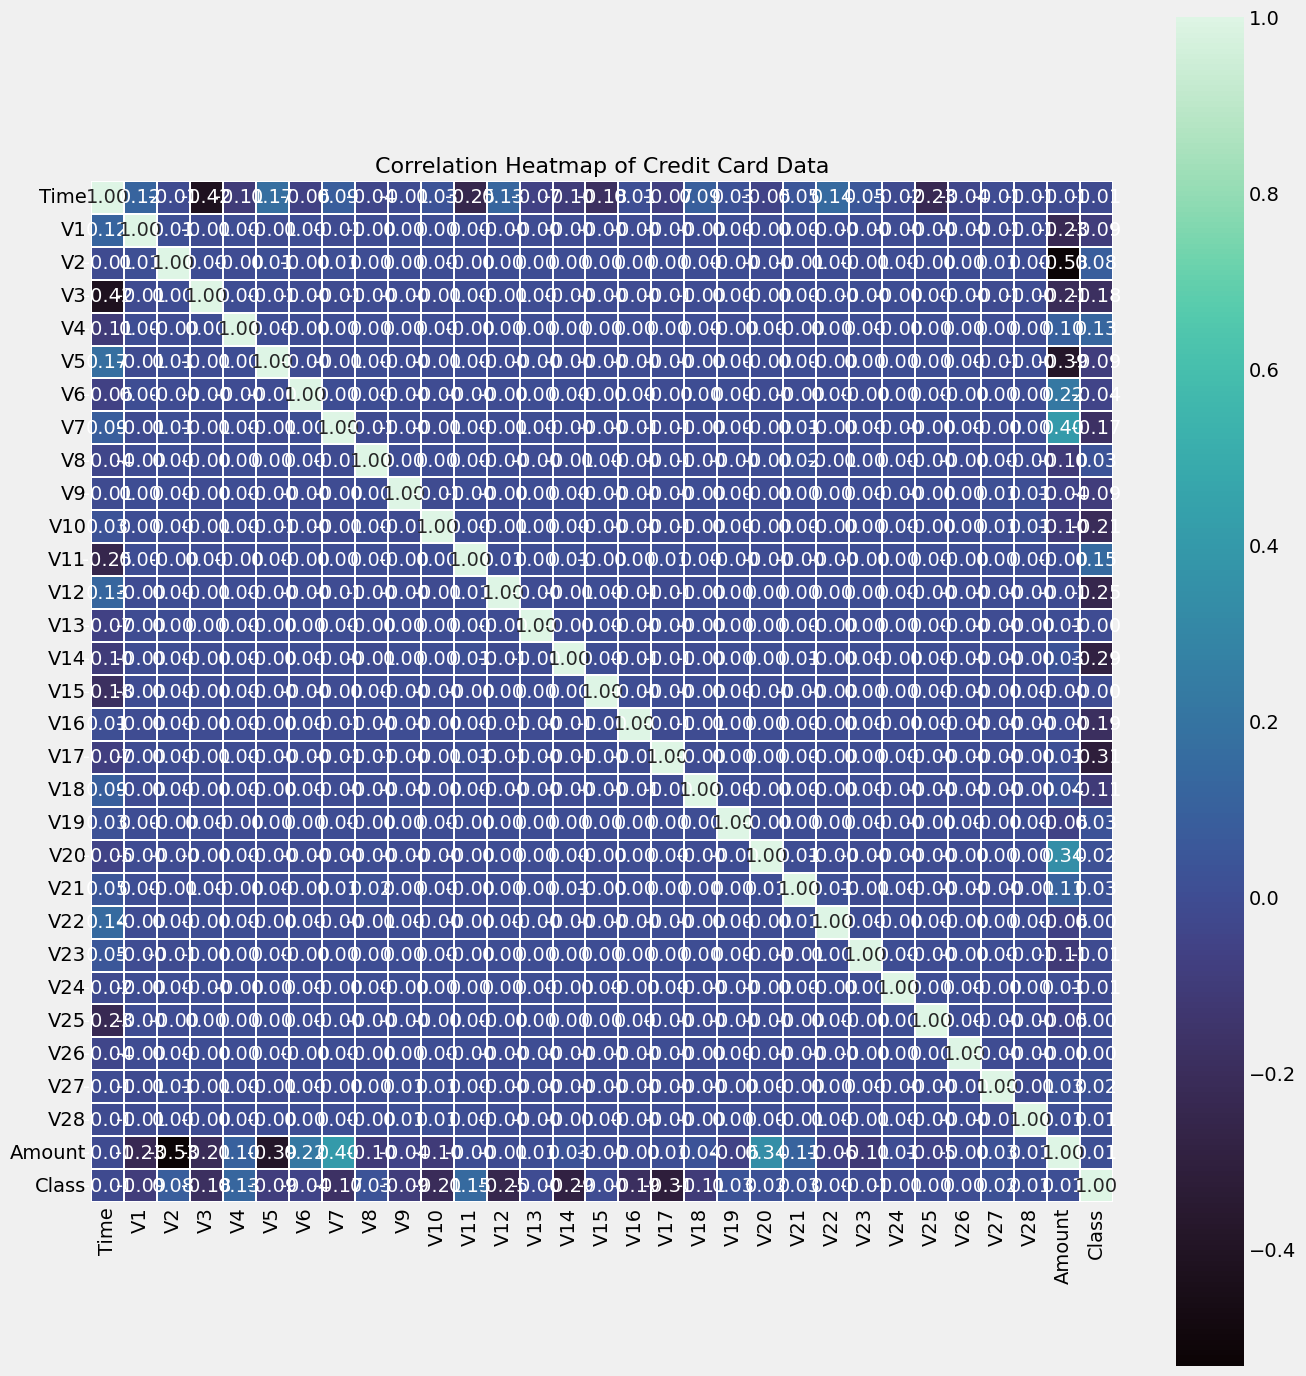

In [21]:
plt.figure(figsize=(14, 14))
corr = creditCard.corr()

sns.heatmap(
    corr,
    xticklabels=corr.columns,
    yticklabels=corr.columns,
    linewidths=0.1,
    cmap="mako",
    annot=True,
    fmt=".2f",
    square=True
)

plt.title("Correlation Heatmap of Credit Card Data", fontsize=16)
plt.tight_layout()
plt.show()

# **Resolving the Imbalanced Features**

####**I want only to showcase the influence of neglecting this problem**

In [22]:
X = creditCard.drop('Class', axis=1)
y = creditCard['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [23]:
y_test.value_counts()

,count
Class,
0.0,56429
1.0,104


####**Under Sampling the Imbalanced Feature**


*  https://imbalanced-learn.org/stable/
*  https://scikit-learn.org/1.5/modules/generated/sklearn.utils.resample.html#sklearn.utils.resample

| Technique                   | Status | Assigned to   |
|-----------------------------|--------|-------------- |
| Random Under Sampling (RUS) |    ✅  | Adham        |
| Cluster Centriods           |    ✅  | Adham        |             
| Tomek Links                 |    ✅  | Adham        |  
| NearMiss                    |    ✅  | Adham        |  


#####**Random Under Sampling**

In [24]:
majority_class = creditCard[creditCard['Class'] == 0]
minority_class = creditCard[creditCard['Class'] == 1]

majority_random_down_sampled = resample(majority_class,
                                replace=False,
                                n_samples=len(minority_class),
                                random_state=42)

random_under_sampled_df = pd.concat([majority_random_down_sampled, minority_class]).sample(frac=1, random_state=42).reset_index(drop=True)

In [25]:
X_rand_Under_Sampling = random_under_sampled_df.drop('Class', axis=1)
y_rand_Under_Sampling = random_under_sampled_df['Class']
X_train_random_under_samples, X_test_random_under_samples, y_train_random_under_samples, y_test_random_under_samples = train_test_split(X_rand_Under_Sampling, y_rand_Under_Sampling, test_size=0.33, random_state=42)

#####**Cluster Centroids**



In [26]:
cc = ClusterCentroids(random_state=42)
X_resampled_cc, y_resampled_cc = cc.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:390: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Input y contains NaN.

##### **TomekLinks**

In [ ]:
tomek = TomekLinks()
X_resampled_tl, y_resampled_tl = tomek.fit_resample(X_train, y_train)

##### **Near Miss**

In [ ]:
nm = NearMiss(version=1)
X_resampled_nm, y_resampled_nm = nm.fit_resample(X, y)
X_train_nm, X_test_nm, y_train_nm, y_test_nm = train_test_split(X_resampled_nm, y_resampled_nm, test_size=0.2, random_state=42)

####**Over Sampling the Imbalanced Feature**




**SMOTE Technique**

In [ ]:
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_resampled_SM, y_train_resampled_SM = smote.fit_resample(X_train, y_train)

**Smote + Heavy Penalty for minority class**

In [ ]:
# While Fiting Out Data Using Logistic Regression Classfier we will Add C = 0.1 , class_weight={0: 1, 1: 12}

# **Predict The Fraud Transitions Cross The Different Models**

###**KNN Classfier**

In [ ]:
# accuracy_score_K = []
# precision_score_K = []
# recall_score_K = []
# f1_score_K = []
# auc_score_K = []

# KNN_Imbalnced_Results = pd.DataFrame({
#     'K Value' : range(1,15),
#     'Accuracy Score' : accuracy_score_K,
#     'Precision Score' : precision_score_K,
#     'Recall Score' : recall_score_K,
#     'F1 Score' : f1_score_K,
#     'AUC Curve' : auc_score_K,
#     'Imbalnced Feature Statue' : True,
# })

**Without Imbalancing**

In [ ]:
# for k in range(1,15):
#   knn = KNeighborsClassifier(n_neighbors=k)
#   knn.fit(X_train,y_train)
#   y_pred = knn.predict(X_test)
#   y_probs_knn = knn.predict_proba(X_test)[:, 1]

#   accuracy_score_K.append(accuracy_score(y_test, y_pred))
#   precision_score_K.append(precision_score(y_test, y_pred))
#   recall_score_K.append(recall_score(y_test, y_pred))
#   f1_score_K.append(f1_score(y_test, y_pred))
#   auc_score_K.append(roc_auc_score(y_test, y_probs_knn))

In [ ]:
# fpr, tpr, _ = roc_curve(y_test, y_probs_knn)
# plt.plot(fpr, tpr, color='blue', lw=2, label=f'KNN (AUC = {roc_auc_knn:.2f})')

#### **Insights**

**Accuracy Score Over K'S**

In [ ]:
# sns.lineplot(x="K Value", y="Accuracy Score", data=KNN_Imbalnced_Results)

**Precision Score Over K'S**

In [ ]:
# sns.lineplot(x="K Value", y="Precision Score", data=KNN_Imbalnced_Results)

**Recall Score Over K'S**

In [ ]:
# sns.lineplot(x="K Value", y="Recall Score", data=KNN_Imbalnced_Results)

**F1 Score Over K'S**

In [ ]:
# sns.lineplot(x="K Value", y="F1 Score", data=KNN_Imbalnced_Results)

###**Logistic Regression**

In [ ]:
Logistic_Regression_Records = pd.DataFrame(columns = ['Model Name' , 'Accuracy Score' , 'Precision Score' , 'Recall Score' ,'F1 Score' ,'AUC Score' , 'ROC Curve', 'Confusion Matrix' , 'Imbalnced Feature Statue' , 'Technique' ])

**Without Imbalancing**

In [ ]:
Logistic_Regresion_Model_Before_Imbalance = LogisticRegression(max_iter = 5000)
Logistic_Regresion_Model_Before_Imbalance.fit(X_train, y_train)
y_pred_LR_Before_Imbalance = Logistic_Regresion_Model_Before_Imbalance.predict(X_test)
y_pred_proba = Logistic_Regresion_Model_Before_Imbalance.predict_proba(X_test)[:, 1]


LR_Imbalanced = {
    'Model Name': 'Logistic Regression',
    'Accuracy Score': accuracy_score(y_test, y_pred_LR_Before_Imbalance),
    'Precision Score': precision_score(y_test, y_pred_LR_Before_Imbalance),
    'Recall Score': recall_score(y_test, y_pred_LR_Before_Imbalance),
    'F1 Score': f1_score(y_test, y_pred_LR_Before_Imbalance),
    'AUC Score': roc_auc_score(y_test, y_pred_proba),
    'ROC Curve': roc_curve(y_test, y_pred_proba),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_LR_Before_Imbalance),
    'Imbalnced Feature Statue': True,
    'Technique': "Imbalanced Features"
}

Logistic_Regression_Records = pd.concat([Logistic_Regression_Records, pd.DataFrame([LR_Imbalanced])], ignore_index=True)

**Random Under Sampling**

In [ ]:
Logistic_Regresion_Model_After_RUS = LogisticRegression(max_iter = 10000)
Logistic_Regresion_Model_After_RUS.fit(X_train_random_under_samples, y_train_random_under_samples)
y_random_under_sampled_pred = Logistic_Regresion_Model_After_RUS.predict(X_test_random_under_samples)
y_pred_proba_RUS = Logistic_Regresion_Model_After_RUS.predict_proba(X_test_random_under_samples)[:, 1]

LR_RUS = {
    'Model Name': 'Logistic Regression',
    'Accuracy Score': accuracy_score(y_test_random_under_samples, y_random_under_sampled_pred),
    'Precision Score': precision_score(y_test_random_under_samples, y_random_under_sampled_pred),
    'Recall Score': recall_score(y_test_random_under_samples, y_random_under_sampled_pred),
    'F1 Score': f1_score(y_test_random_under_samples, y_random_under_sampled_pred),
    'AUC Score': roc_auc_score(y_test_random_under_samples, y_pred_proba_RUS),
    'ROC Curve': roc_curve(y_test_random_under_samples, y_pred_proba_RUS),
    'Confusion Matrix': confusion_matrix(y_test_random_under_samples, y_random_under_sampled_pred),
    'Imbalnced Feature Statue': False,
    'Technique': 'Random Under Sampling'
}
Logistic_Regression_Records = pd.concat([Logistic_Regression_Records, pd.DataFrame([LR_RUS])], ignore_index=True)

**Cluster Centroids**

In [ ]:
Logistic_Regresion_Model_After_CC = LogisticRegression(max_iter = 10000)
Logistic_Regresion_Model_After_CC.fit(X_resampled_cc, y_resampled_cc)
y_cc_pred = Logistic_Regresion_Model_After_CC.predict(X_test)
y_pred_proba_cc = Logistic_Regresion_Model_After_CC.predict_proba(X_test)[:, 1]

LR_CC = {
    'Model Name': 'Logistic Regression',
    'Accuracy Score': accuracy_score(y_test, y_cc_pred),
    'Precision Score': precision_score(y_test, y_cc_pred),
    'Recall Score': recall_score(y_test, y_cc_pred),
    'F1 Score': f1_score(y_test, y_cc_pred),
    'AUC Score': roc_auc_score(y_test, y_pred_proba_cc),
    'ROC Curve': roc_curve(y_test, y_pred_proba_cc),
    'Confusion Matrix': confusion_matrix(y_test, y_cc_pred),
    'Imbalnced Feature Statue': False,
    'Technique': 'Cluster Centroids'
}
Logistic_Regression_Records = pd.concat([Logistic_Regression_Records, pd.DataFrame([LR_CC])], ignore_index=True)

**Tomek Links**

In [ ]:
Logistic_Regresion_Model_After_TL = LogisticRegression(max_iter = 10000)
Logistic_Regresion_Model_After_TL.fit(X_resampled_tl, y_resampled_tl)
y_tl_pred = Logistic_Regresion_Model_After_TL.predict(X_test)
y_pred_proba_tl = Logistic_Regresion_Model_After_TL.predict_proba(X_test)[:, 1]

LR_TL = {
    'Model Name': 'Logistic Regression',
    'Accuracy Score': accuracy_score(y_test, y_tl_pred),
    'Precision Score': precision_score(y_test, y_tl_pred),
    'Recall Score': recall_score(y_test, y_tl_pred),
    'F1 Score': f1_score(y_test, y_tl_pred),
    'AUC Score': roc_auc_score(y_test, y_pred_proba_tl),
    'ROC Curve': roc_curve(y_test, y_pred_proba_tl),
    'Confusion Matrix': confusion_matrix(y_test, y_tl_pred),
    'Imbalnced Feature Statue': False,
    'Technique': 'Tomek Links'
}
Logistic_Regression_Records = pd.concat([Logistic_Regression_Records, pd.DataFrame([LR_TL])], ignore_index=True)

**Near Miss**

In [ ]:
Logistic_Regresion_Model_After_NM = LogisticRegression(max_iter=10000)
Logistic_Regresion_Model_After_NM.fit(X_train_nm, y_train_nm)
y_nm_pred = Logistic_Regresion_Model_After_NM.predict(X_test_nm)
y_pred_proba_nm = Logistic_Regresion_Model_After_NM.predict_proba(X_test_nm)[:, 1]

LR_NM = {
    'Model Name': 'Logistic Regression',
    'Accuracy Score': accuracy_score(y_test_nm, y_nm_pred),
    'Precision Score': precision_score(y_test_nm, y_nm_pred),
    'Recall Score': recall_score(y_test_nm, y_nm_pred),
    'F1 Score': f1_score(y_test_nm, y_nm_pred),
    'AUC Score': roc_auc_score(y_test_nm, y_pred_proba_nm),
    'ROC Curve': roc_curve(y_test_nm, y_pred_proba_nm),
    'Confusion Matrix': confusion_matrix(y_test_nm, y_nm_pred),
    'Imbalnced Feature Statue': False,
    'Technique': 'Near Miss'
}
Logistic_Regression_Records = pd.concat([Logistic_Regression_Records, pd.DataFrame([LR_NM])], ignore_index=True)

**SMOTE Technique**

In [ ]:
Logistic_Regresion_Model_After_SMOTE = LogisticRegression( random_state=42)
Logistic_Regresion_Model_After_SMOTE.fit(X_train_resampled_SM, y_train_resampled_SM)
y_smote_pred = Logistic_Regresion_Model_After_SMOTE.predict(X_test)
y_pred_proba_smote = Logistic_Regresion_Model_After_SMOTE.predict_proba(X_test)[:, 1]

LR_SMOTE = {
    'Model Name': 'Logistic Regression',
    'Accuracy Score': accuracy ,
    'Precision Score': precision_score(y_test, y_smote_pred),
    'Recall Score': recall ,
    'F1 Score': f1_score(y_test, y_smote_pred),
    'AUC Score': roc_auc_score(y_test, y_pred_proba_sm),
    'ROC Curve': roc_curve(y_test, y_pred_proba_sm),
    'Confusion Matrix': confusion_matrix(y_test, y_smote),
    'Imbalnced Feature Statue': False,
    'Technique': 'SMOTE'
}
Logistic_Regression_Records = pd.concat([Logistic_Regression_Records, pd.DataFrame([LR_SMOTE])], ignore_index=True)

**Smote + Heavy Penalty for minority class**

In [ ]:
Logistic_Regresion_Model_After_SMOTE_Heavy_Penalty = LogisticRegression(C=0.1, class_weight={0: 1, 1: 12}, random_state=42)
Logistic_Regresion_Model_After_SMOTE_Heavy_Penalty.fit(X_train_resampled_SM, y_train_resampled_SM)
y_smote_heavy_penalty_pred = Logistic_Regresion_Model_After_SMOTE_Heavy_Penalty.predict(X_test)
y_pred_proba_smote_heavy_penalty = Logistic_Regresion_Model_After_SMOTE_Heavy_Penalty.predict_proba(X_test)[:, 1]

LR_SMOTE_Heavy_Penalty = {
    'Model Name': 'Logistic Regression',
    'Accuracy Score': accuracy_score(y_test, y_smote_heavy_penalty_pred),
    'Precision Score': precision_score(y_test, y_smote_heavy_penalty_pred),
    'Recall Score': recall_score(y_test, y_smote_heavy_penalty_pred),
    'F1 Score': f1_score(y_test, y_smote_heavy_penalty_pred),
    'AUC Score': roc_auc_score(y_test, y_pred_proba_smote_heavy_penalty),
    'ROC Curve': roc_curve(y_test, y_pred_proba_smote_heavy_penalty),
    'Confusion Matrix': confusion_matrix(y_test, y_smote_heavy_penalty_pred),
    'Imbalnced Feature Statue': False,
    'Technique': 'SMOTE + Heavy Penalty for minority class'
}
Logistic_Regression_Records = pd.concat([Logistic_Regression_Records, pd.DataFrame([LR_SMOTE_Heavy_Penalty])], ignore_index=True)

#### **Insights**

**Comparing Out Prefromance Measures Across Under Sampling Techniques**

In [ ]:
sorted_by_F1_Score = Logistic_Regression_Records.sort_values(by="F1 Score", ascending=False)
sorted_by_F1_Score
# We can say that based on sorting by F1 Score Near Miss is the Best One

In [ ]:
sorted_data = sorted_by_F1_Score.sort_values(by="F1 Score", ascending=False)
fig, axes = plt.subplots(5, 1, figsize=(10,8))

title_fontsize = 12
label_fontsize = 10
tick_fontsize = 8

sns.barplot(data=sorted_data, y="Technique", x="Accuracy Score", ax=axes[0], orient='h')
axes[0].set_title("Accuracy Score by Technique", fontsize=title_fontsize)
axes[0].set_xlabel("Accuracy Score", fontsize=label_fontsize)
axes[0].set_ylabel("Technique", fontsize=label_fontsize)
for bar in axes[0].patches:
    axes[0].text(
        bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2,
        f"{bar.get_width():.3f}",
        fontsize=label_fontsize, va='center'
    )

sorted_data = sorted_data.sort_values(by="Precision Score", ascending=False)
sns.barplot(data=sorted_data, y="Technique", x="Precision Score", ax=axes[1], orient='h')
axes[1].set_title("Precision Score by Technique", fontsize=title_fontsize)
axes[1].set_xlabel("Precision Score", fontsize=label_fontsize)
axes[1].set_ylabel("Technique", fontsize=label_fontsize)
for bar in axes[1].patches:
    axes[1].text(
        bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2,
        f"{bar.get_width():.3f}",
        fontsize=label_fontsize, va='center'
    )

sorted_data = sorted_data.sort_values(by="Recall Score", ascending=False)
sns.barplot(data=sorted_data, y="Technique", x="Recall Score", ax=axes[2], orient='h')
axes[2].set_title("Recall Score by Technique", fontsize=title_fontsize)
axes[2].set_xlabel("Recall Score", fontsize=label_fontsize)
axes[2].set_ylabel("Technique", fontsize=label_fontsize)
for bar in axes[2].patches:
    axes[2].text(
        bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2,
        f"{bar.get_width():.3f}",
        fontsize=label_fontsize, va='center'
    )

sorted_data = sorted_data.sort_values(by="F1 Score", ascending=False)
sns.barplot(data=sorted_data, y="Technique", x="F1 Score", ax=axes[3], orient='h')
axes[3].set_title("F1 Score by Technique", fontsize=title_fontsize)
axes[3].set_xlabel("F1 Score", fontsize=label_fontsize)
axes[3].set_ylabel("Technique", fontsize=label_fontsize)
for bar in axes[3].patches:
    axes[3].text(
        bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2,
        f"{bar.get_width():.3f}",
        fontsize=label_fontsize, va='center'
    )

sorted_data = sorted_data.sort_values(by="AUC Score", ascending=False)
sns.barplot(data=sorted_data, y="Technique", x="AUC Score", ax=axes[4], orient='h')
axes[4].set_title("AUC Score by Technique", fontsize=title_fontsize)
axes[4].set_xlabel("AUC Score", fontsize=label_fontsize)
axes[4].set_xlabel("AUC Score", fontsize=label_fontsize)
axes[4].set_ylabel("Technique", fontsize=label_fontsize)
for bar in axes[4].patches:
    axes[4].text(
        bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2,
        f"{bar.get_width():.3f}",
        fontsize=label_fontsize, va='center'
    )

plt.tight_layout()

plt.show()

**AUC - ROC Curve Under Different UnderSampling Techniques**

In [ ]:
num_models = Logistic_Regression_Records.shape[0]

fig, axes = plt.subplots(1, num_models, figsize=(5 * num_models, 6))
fig.suptitle("ROC Under Different UnderSampling Techniques")

for i in range(num_models):
    fpr, tpr, thresholds = Logistic_Regression_Records['ROC Curve'].iloc[i]
    ax = axes[i] if num_models > 1 else axes
    roc_auc = auc(fpr, tpr)
    technique_name = Logistic_Regression_Records["Technique"].iloc[i]
    ax.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
    ax.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
    ax.set_title(technique_name)
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc='lower right')
    ax.grid()

plt.tight_layout()
plt.show()

**Cunfusion Matrix Under Different UnderSampling Techniques**

In [ ]:
fig, axes = plt.subplots(1, num_models, figsize=(5 * num_models, 5))
fig.suptitle("Confusion Matrix Under Different UnderSampling Techniques")

for i in range(num_models):
    technique_name = Logistic_Regression_Records["Technique"].iloc[i]
    confusion_matrix_data = Logistic_Regression_Records["Confusion Matrix"].iloc[i]
    ax = axes[i] if num_models > 1 else axes

    sns.heatmap(confusion_matrix_data, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    sns.set(font_scale=1.5)
    ax.set_title(technique_name)
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')

plt.tight_layout()
plt.show()

***The Conclusion that while Over Sampling (Near MIss) is the Best Technqiue With Best Preformance Measures ~> Let's Apply Regualrization Techniques***

#### **Lasso Regularization Technique on Logistic Regression**
*Near Miss Undersampling for Imbalanced Features*

In [ ]:
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, max_iter=10000)
lasso_model.fit(X_train_nm, y_train_nm)
lasso_preds = lasso_model.predict(X_test_nm)
lasso_preds_proba = lasso_model.predict_proba(X_test_nm)[:, 1]

lasso_results = {
    "Accuracy": accuracy_score(y_test_nm, lasso_preds),
    "Precision": precision_score(y_test_nm, lasso_preds),
    "Recall": recall_score(y_test_nm, lasso_preds),
    "F1 Score": f1_score(y_test_nm, lasso_preds),
    "AUC Score": roc_auc_score(y_test_nm, lasso_preds_proba),
    "ROC Curve": roc_curve(y_test_nm, lasso_preds_proba),
    "Confusion Matrix": confusion_matrix(y_test_nm, lasso_preds)
}

#### **Ridge Regularization Technique on Logistic Regression**
*Near Miss Undersampling for Imbalanced Features*

In [ ]:
ridge_model = LogisticRegression(penalty='l2', C=1.0, max_iter=10000)
ridge_model.fit(X_train_nm, y_train_nm)
ridge_preds = ridge_model.predict(X_test_nm)
ridge_preds_proba = ridge_model.predict_proba(X_test_nm)[:, 1]

ridge_results = {
    "Accuracy": accuracy_score(y_test_nm, ridge_preds),
    "Precision": precision_score(y_test_nm, ridge_preds),
    "Recall": recall_score(y_test_nm, ridge_preds),
    "F1 Score": f1_score(y_test_nm, ridge_preds),
    "AUC Score": roc_auc_score(y_test_nm, ridge_preds_proba),
    "ROC Curve": roc_curve(y_test_nm, ridge_preds_proba),
    "Confusion Matrix": confusion_matrix(y_test_nm, ridge_preds)
}


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

fpr_lasso, tpr_lasso, _ = lasso_results['ROC Curve']
roc_auc_lasso = lasso_results['AUC Score']
axes[0].plot(fpr_lasso, tpr_lasso, color='blue', lw=2, label=f'Lasso (AUC = {roc_auc_lasso:.2f})')
axes[0].plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Lasso ROC Curve')
axes[0].legend(loc='lower right')
axes[0].grid()

fpr_ridge, tpr_ridge, _ = ridge_results['ROC Curve']
roc_auc_ridge = ridge_results['AUC Score']
axes[1].plot(fpr_ridge, tpr_ridge, color='red', lw=2, label=f'Ridge (AUC = {roc_auc_ridge:.2f})')
axes[1].plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Ridge ROC Curve')
axes[1].legend(loc='lower right')
axes[1].grid()

plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(lasso_results['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Lasso Confusion Matrix')

sns.heatmap(ridge_results['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title('Ridge Confusion Matrix')

plt.tight_layout()
plt.show()

In [ ]:
ridge_results_for_table = ridge_results.copy()
del ridge_results_for_table["ROC Curve"]
del ridge_results_for_table["Confusion Matrix"]

print("Ridge Logistic Regression Results:")
print(tabulate.tabulate(ridge_results_for_table.items(), headers=["Metric", "Value"], tablefmt="grid"))


In [ ]:
lasso_results_for_table = lasso_results.copy()
del lasso_results_for_table["ROC Curve"]
del lasso_results_for_table["Confusion Matrix"]

print("nLasso Logistic Regression Results:")
print(tabulate.tabulate(lasso_results_for_table.items(), headers=["Metric", "Value"], tablefmt="grid"))

# **There is No Effect on Prefromance metrics after applying *Regularization* techniques into Logistic Regression Classfier after Dealing with Imbalanced Featrues Using Near Miss Under Sampling Technique**